In [1]:
import numpy as np
import pandas as pd
import re


In [2]:
# data = pd.read_csv('../Call_Transcripts_Seeking_Alpha/CallTranscriptsFITB.txt', sep=" ", header=None)
file = open('/Users/akshitachawdhary/Desktop/DA_Davidson/Capstone_NLP_DIWD/Call_Transcripts_Seeking_Alpha/CallTranscriptsFITB.txt','r', encoding='cp1252') 
fullCallTranscript = file.readlines()   #.split('Question-and-Answer Session')
len(fullCallTranscript)
# text = (file.readlines())

1869

In [3]:
q_and_a_index = fullCallTranscript.index("Question-and-Answer Session\n")

In [4]:
# Divide the transcript into initial summary and Q & A Session
q_and_a = fullCallTranscript[q_and_a_index:]
summary = fullCallTranscript[:q_and_a_index]

In [5]:
execIndex = summary.index("Executives\n")
analystIndex = summary.index("Analysts\n")
operatorIndex = summary.index("Operator\n")

In [6]:
executives = summary[execIndex + 1 : analystIndex]
print(executives)
executiveDict = {}
for e in executives:
    name, position = e.split('-')
    executiveDict[name.strip()] = position.strip()
executiveDict

['Jenn Thompson - Director, IR\n', 'Andrew Cecere - Chairman, President and CEO\n', 'Terrance Dolan - Vice Chairman and CFO\n']


{'Andrew Cecere': 'Chairman, President and CEO',
 'Jenn Thompson': 'Director, IR',
 'Terrance Dolan': 'Vice Chairman and CFO'}

In [7]:
analysts = summary[analystIndex +1: operatorIndex]
print(analysts)

analystsDict = {}
for a in analysts:
    name, company = a.split('-')
    analystsDict[name.strip()] = company.strip()
analystsDict

['John McDonald - Sanford C. Bernstein & Co., LLC\n', 'John Pancari - Evercore ISI\n', "Matthew O'Connor - Deutsche Bank\n", 'Kenneth Usdin - Jefferies & Company, Inc.\n', 'Erika Najarian - Bank of America Merrill Lynch\n', "Scott Siefers - Sandler O'Neill + Partners, L.P\n", 'Betsy Graseck - Morgan Stanley\n', 'Mike Mayo - Wells Fargo Securities\n', 'Marty Mosby - Vining Sparks\n', 'Kevin Barker - Piper Jaffray\n', 'Vivek Juneja - JPMorgan Chase & Company\n', 'Saul Martinez - UBS\n', 'Gerard Cassidy - RBC Capital Markets\n', 'Brian Klock - Keefe, Bruyette & Woods\n']


{'Betsy Graseck': 'Morgan Stanley',
 'Brian Klock': 'Keefe, Bruyette & Woods',
 'Erika Najarian': 'Bank of America Merrill Lynch',
 'Gerard Cassidy': 'RBC Capital Markets',
 'John McDonald': 'Sanford C. Bernstein & Co., LLC',
 'John Pancari': 'Evercore ISI',
 'Kenneth Usdin': 'Jefferies & Company, Inc.',
 'Kevin Barker': 'Piper Jaffray',
 'Marty Mosby': 'Vining Sparks',
 "Matthew O'Connor": 'Deutsche Bank',
 'Mike Mayo': 'Wells Fargo Securities',
 'Saul Martinez': 'UBS',
 'Scott Siefers': "Sandler O'Neill + Partners, L.P",
 'Vivek Juneja': 'JPMorgan Chase & Company'}

In [8]:
# Get and store the answers of the executives in the executivesDictionary

# elem,next_elem in zip(li, li[1:]+[li[0]]):
for item,next_item in zip(q_and_a, q_and_a[1:]+[q_and_a[0]]):
#     print(item)
    if item.strip() in executiveDict.keys():
        val = executiveDict[item.strip()]
        executiveDict[item.strip()] = val + ' ' + next_item
#         print(item, next_item)
        
#print(executiveDict['Andrew Cecere'])

In [11]:
# Get and store the answers of the analysts in the analystsDictionary

# elem,next_elem in zip(li, li[1:]+[li[0]]):
for item,next_item in zip(q_and_a, q_and_a[1:]+[q_and_a[0]]):
#     print(item)
    if item.strip() in analystsDict.keys():
        val = analystsDict[item.strip()]
        analystsDict[item.strip()] = val + ' ' + next_item
#         print(item, next_item)
        
print(analystsDict.keys())
print(analystsDict['John McDonald'])

dict_keys(['John McDonald', 'John Pancari', "Matthew O'Connor", 'Kenneth Usdin', 'Erika Najarian', 'Scott Siefers', 'Betsy Graseck', 'Mike Mayo', 'Marty Mosby', 'Kevin Barker', 'Vivek Juneja', 'Saul Martinez', 'Gerard Cassidy', 'Brian Klock'])
Sanford C. Bernstein & Co., LLC Hi good morning guys. Wanted to ask a little bit about the positive operating leverage, you had a nice print on positive operating leverage this quarter, looks like about 80 basis points. Just wondering how much help you got on the expense line this quarter from some of the accrual reversals and any other one-timers that you mentioned?
 Okay. And Andy just a quick follow-up. Is the 1% to 1.5% still kind of a good target as you sit here now and look out to 2019 for the operating leverage that you're going to shoot for?
 Okay. And then one quick follow-up Terry. The FDI insurance fees lower that you mentioned, what was the driver of that? And you still have a stepdown coming from the end of the surcharge later in the

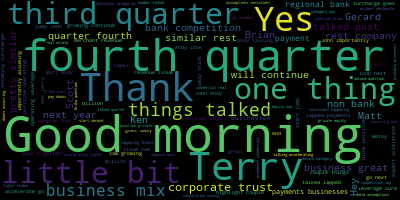

In [13]:
import wordcloud
wordcloud = wordcloud.WordCloud() # Create a wordcloud object
wordcloud.generate(executiveDict['Andrew Cecere'])   # Generate a wordcloud
wordcloud.to_image()              # Visualize the word cloud

In [14]:
# Pre processing

In [15]:
# Coverting text to lowercase

In [9]:
executiveDict['Andrew Cecere'] = executiveDict['Andrew Cecere'].lower()
print(executiveDict['Andrew Cecere'])

chairman, president and ceo i'd ask terry to start, then i'll jump in.
 and john, andy. as we look at next year, i would highlight a couple of things. as we've talked about, we've lapped the payments to the merchant revenue issue and you saw that that's growing 4%. we continue to expect that to accelerate as we go into next quarter and next year.
 yes, it is.
 and john, importantly, we're not assuming that surcharge goes away as we think about positive operating leverage in 2019.
 sure.
 good morning.
 hey matt.
 matt, this is andy. we were talking about that, the 0.9% accelerating to a higher number on a linked-quarter basis.
 thanks matt.
 hey ken.
 and terry our deposit beta assumptions have been consistent with what's happening.
 thanks ken.
 good morning erika.
 you start there second question.
 and then erika on your question on private equity you're now in bank or non-bank competition, i would say that is evident in some of the wholesale categories. i think it's probably most pr

In [42]:
df = pd.DataFrame().append(executiveDict, ignore_index=True)

In [43]:
df = df.transpose()

In [44]:
df

,0
Andrew Cecere,"chairman, president and ceo i'd ask terry to s..."
Jenn Thompson,"Director, IR That concludes our earnings call...."
Terrance Dolan,"Vice Chairman and CFO Yes, John, let me talk a..."


In [46]:
df.reset_index()

,index,0
0,Andrew Cecere,"chairman, president and ceo i'd ask terry to s..."
1,Jenn Thompson,"Director, IR That concludes our earnings call...."
2,Terrance Dolan,"Vice Chairman and CFO Yes, John, let me talk a..."


In [27]:
data = executiveDict['Andrew Cecere'] 
#print(data)

In [29]:
# split into sentences

In [28]:
from nltk import sent_tokenize
sentences = sent_tokenize(data)
print(sentences[0])

chairman, president and ceo i'd ask terry to start, then i'll jump in.


In [30]:
# split into words

In [31]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(data)
print(tokens[:100])

['chairman', ',', 'president', 'and', 'ceo', 'i', "'d", 'ask', 'terry', 'to', 'start', ',', 'then', 'i', "'ll", 'jump', 'in', '.', 'and', 'john', ',', 'andy', '.', 'as', 'we', 'look', 'at', 'next', 'year', ',', 'i', 'would', 'highlight', 'a', 'couple', 'of', 'things', '.', 'as', 'we', "'ve", 'talked', 'about', ',', 'we', "'ve", 'lapped', 'the', 'payments', 'to', 'the', 'merchant', 'revenue', 'issue', 'and', 'you', 'saw', 'that', 'that', "'s", 'growing', '4', '%', '.', 'we', 'continue', 'to', 'expect', 'that', 'to', 'accelerate', 'as', 'we', 'go', 'into', 'next', 'quarter', 'and', 'next', 'year', '.', 'yes', ',', 'it', 'is', '.', 'and', 'john', ',', 'importantly', ',', 'we', "'re", 'not', 'assuming', 'that', 'surcharge', 'goes', 'away', 'as']


In [42]:
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
print(stripped[:100])

['chairman', '', 'president', 'and', 'ceo', 'i', 'd', 'ask', 'terry', 'to', 'start', '', 'then', 'i', 'll', 'jump', 'in', '', 'and', 'john', '', 'andy', '', 'as', 'we', 'look', 'at', 'next', 'year', '', 'i', 'would', 'highlight', 'a', 'couple', 'of', 'things', '', 'as', 'we', 've', 'talked', 'about', '', 'we', 've', 'lapped', 'the', 'payments', 'to', 'the', 'merchant', 'revenue', 'issue', 'and', 'you', 'saw', 'that', 'that', 's', 'growing', '4', '', '', 'we', 'continue', 'to', 'expect', 'that', 'to', 'accelerate', 'as', 'we', 'go', 'into', 'next', 'quarter', 'and', 'next', 'year', '', 'yes', '', 'it', 'is', '', 'and', 'john', '', 'importantly', '', 'we', 're', 'not', 'assuming', 'that', 'surcharge', 'goes', 'away', 'as']


In [32]:
# remove all tokens that are not alphabetic

In [43]:
words = [word for word in stripped if word.isalpha()]
print(words[:100])

['chairman', 'president', 'and', 'ceo', 'i', 'd', 'ask', 'terry', 'to', 'start', 'then', 'i', 'll', 'jump', 'in', 'and', 'john', 'andy', 'as', 'we', 'look', 'at', 'next', 'year', 'i', 'would', 'highlight', 'a', 'couple', 'of', 'things', 'as', 'we', 've', 'talked', 'about', 'we', 've', 'lapped', 'the', 'payments', 'to', 'the', 'merchant', 'revenue', 'issue', 'and', 'you', 'saw', 'that', 'that', 's', 'growing', 'we', 'continue', 'to', 'expect', 'that', 'to', 'accelerate', 'as', 'we', 'go', 'into', 'next', 'quarter', 'and', 'next', 'year', 'yes', 'it', 'is', 'and', 'john', 'importantly', 'we', 're', 'not', 'assuming', 'that', 'surcharge', 'goes', 'away', 'as', 'we', 'think', 'about', 'positive', 'operating', 'leverage', 'in', 'sure', 'good', 'morning', 'hey', 'matt', 'matt', 'this', 'is', 'andy']


In [34]:
#filter out stop words

In [44]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['chairman', 'president', 'ceo', 'ask', 'terry', 'start', 'jump', 'john', 'andy', 'look', 'next', 'year', 'would', 'highlight', 'couple', 'things', 'talked', 'lapped', 'payments', 'merchant', 'revenue', 'issue', 'saw', 'growing', 'continue', 'expect', 'accelerate', 'go', 'next', 'quarter', 'next', 'year', 'yes', 'john', 'importantly', 'assuming', 'surcharge', 'goes', 'away', 'think', 'positive', 'operating', 'leverage', 'sure', 'good', 'morning', 'hey', 'matt', 'matt', 'andy', 'talking', 'accelerating', 'higher', 'number', 'linkedquarter', 'basis', 'thanks', 'matt', 'hey', 'ken', 'terry', 'deposit', 'beta', 'assumptions', 'consistent', 'happening', 'thanks', 'ken', 'good', 'morning', 'erika', 'start', 'second', 'question', 'erika', 'question', 'private', 'equity', 'bank', 'nonbank', 'competition', 'would', 'say', 'evident', 'wholesale', 'categories', 'think', 'probably', 'prominent', 'commercial', 'real', 'estate', 'category', 'pay', 'downs', 'occurring', 'nonbank', 'competition', 'com

In [38]:
#stemming the words

In [45]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in words]
print(stemmed[:100])

['chairman', 'presid', 'ceo', 'ask', 'terri', 'start', 'jump', 'john', 'andi', 'look', 'next', 'year', 'would', 'highlight', 'coupl', 'thing', 'talk', 'lap', 'payment', 'merchant', 'revenu', 'issu', 'saw', 'grow', 'continu', 'expect', 'acceler', 'go', 'next', 'quarter', 'next', 'year', 'ye', 'john', 'importantli', 'assum', 'surcharg', 'goe', 'away', 'think', 'posit', 'oper', 'leverag', 'sure', 'good', 'morn', 'hey', 'matt', 'matt', 'andi', 'talk', 'acceler', 'higher', 'number', 'linkedquart', 'basi', 'thank', 'matt', 'hey', 'ken', 'terri', 'deposit', 'beta', 'assumpt', 'consist', 'happen', 'thank', 'ken', 'good', 'morn', 'erika', 'start', 'second', 'question', 'erika', 'question', 'privat', 'equiti', 'bank', 'nonbank', 'competit', 'would', 'say', 'evid', 'wholesal', 'categori', 'think', 'probabl', 'promin', 'commerci', 'real', 'estat', 'categori', 'pay', 'down', 'occur', 'nonbank', 'competit', 'come', 'marketplac']


In [49]:
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

def pre_processing_transcripts(text):
    
# data pre-processing

## Converting text to lowercase
    text = text.lower()
    
##split into sentences
    sentences = sent_tokenize(text)
    #print(sentences[0])
    
## split into words
    tokens = word_tokenize(text)
    #print(tokens[:100])
    
## remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    #print(stripped[:100])
    
## remove all tokens that are not alphabetic   
    words = [word for word in stripped if word.isalpha()]
    #print(words[:100])
    
## filter out the stop-words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    #print(words[:100])
    
##filter stop words mcdonald dictonary
    mcdonald_file = open('StopWords_Generic.txt','r')
    mcdonald_stopwords = mcdonald_file.readlines()
    sw = [words for words in mcdonald_stopwords]
    ### stopwords from mcdonald
    a = [s.rstrip() for s in sw] 
    
    stopwords_all = []
    stopwords_all.append(a)
    stopwords_all.append(stop_words)

##lemmatizing the words

    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    print(lemmas)
    
    words = [w for w in words if not w in lemmas]
    #print(words)
    return words
 

new_data = pre_processing_transcripts(executiveDict['Andrew Cecere'])

print(new_data)

['chairman', 'president', 'ceo', 'ask', 'terry', 'start', 'jump', 'john', 'andy', 'look', 'next', 'year', 'would', 'highlight', 'couple', 'things', 'talk', 'lap', 'payments', 'merchant', 'revenue', 'issue', 'saw', 'grow', 'continue', 'expect', 'accelerate', 'go', 'next', 'quarter', 'next', 'year', 'yes', 'john', 'importantly', 'assume', 'surcharge', 'go', 'away', 'think', 'positive', 'operate', 'leverage', 'sure', 'good', 'morning', 'hey', 'matt', 'matt', 'andy', 'talk', 'accelerate', 'higher', 'number', 'linkedquarter', 'basis', 'thank', 'matt', 'hey', 'ken', 'terry', 'deposit', 'beta', 'assumptions', 'consistent', 'happen', 'thank', 'ken', 'good', 'morning', 'erika', 'start', 'second', 'question', 'erika', 'question', 'private', 'equity', 'bank', 'nonbank', 'competition', 'would', 'say', 'evident', 'wholesale', 'categories', 'think', 'probably', 'prominent', 'commercial', 'real', 'estate', 'category', 'pay', 'down', 'occur', 'nonbank', 'competition', 'come', 'marketplace', 'say', 'te

In [50]:
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [51]:
corpus1 = pre_processing_transcripts(executiveDict['Andrew Cecere'])

['chairman', 'president', 'ceo', 'ask', 'terry', 'start', 'jump', 'john', 'andy', 'look', 'next', 'year', 'would', 'highlight', 'couple', 'things', 'talk', 'lap', 'payments', 'merchant', 'revenue', 'issue', 'saw', 'grow', 'continue', 'expect', 'accelerate', 'go', 'next', 'quarter', 'next', 'year', 'yes', 'john', 'importantly', 'assume', 'surcharge', 'go', 'away', 'think', 'positive', 'operate', 'leverage', 'sure', 'good', 'morning', 'hey', 'matt', 'matt', 'andy', 'talk', 'accelerate', 'higher', 'number', 'linkedquarter', 'basis', 'thank', 'matt', 'hey', 'ken', 'terry', 'deposit', 'beta', 'assumptions', 'consistent', 'happen', 'thank', 'ken', 'good', 'morning', 'erika', 'start', 'second', 'question', 'erika', 'question', 'private', 'equity', 'bank', 'nonbank', 'competition', 'would', 'say', 'evident', 'wholesale', 'categories', 'think', 'probably', 'prominent', 'commercial', 'real', 'estate', 'category', 'pay', 'down', 'occur', 'nonbank', 'competition', 'come', 'marketplace', 'say', 'te

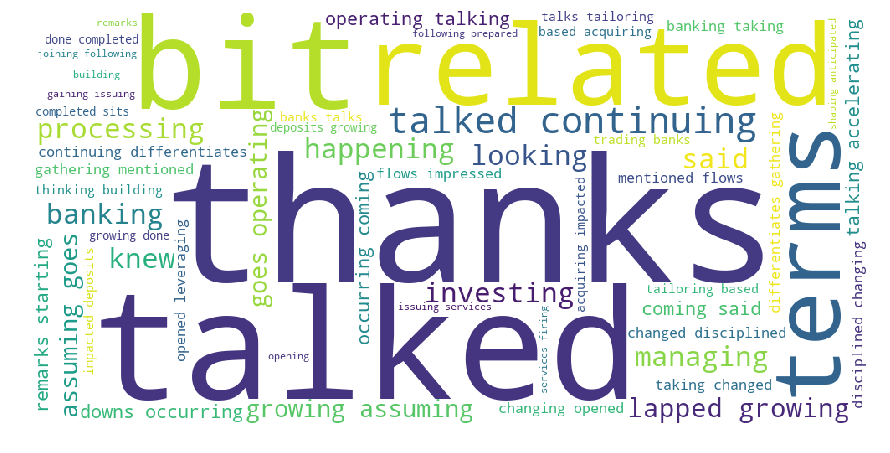

In [53]:
#convert list to string and generate
unique_string=(" ").join(corpus1)
wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

# Sentiment Analysis

In [1]:

import re
 
# Loughran and McDonald Sentiment Word Lists (https://sraf.nd.edu/textual-analysis/resources/)
lmdict = {'Negative': ['abandon', 'abandoned', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abdicated',
                       'abdicates', 'abdicating', 'abdication', 'abdications', 'aberrant', 'aberration', 'aberrational',
                       'aberrations', 'abetting', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'abolish',
                       'abolished', 'abolishes', 'abolishing', 'abrogate', 'abrogated', 'abrogates', 'abrogating',
                       'abrogation', 'abrogations', 'abrupt', 'abruptly', 'abruptness', 'absence', 'absences',
                       'absenteeism', 'abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abusively', 'abusiveness',
                       'accident', 'accidental', 'accidentally', 'accidents', 'accusation', 'accusations', 'accuse',
                       'accused', 'accuses', 'accusing', 'acquiesce', 'acquiesced', 'acquiesces', 'acquiescing',
                       'acquit', 'acquits', 'acquittal', 'acquittals', 'acquitted', 'acquitting', 'adulterate',
                       'adulterated', 'adulterating', 'adulteration', 'adulterations', 'adversarial', 'adversaries',
                       'adversary', 'adverse', 'adversely', 'adversities', 'adversity', 'aftermath', 'aftermaths',
                       'against', 'aggravate', 'aggravated', 'aggravates', 'aggravating', 'aggravation', 'aggravations',
                       'alerted', 'alerting', 'alienate', 'alienated', 'alienates', 'alienating', 'alienation',
                       'alienations', 'allegation', 'allegations', 'allege', 'alleged', 'allegedly', 'alleges',
                       'alleging', 'annoy', 'annoyance', 'annoyances', 'annoyed', 'annoying', 'annoys', 'annul',
                       'annulled', 'annulling', 'annulment', 'annulments', 'annuls', 'anomalies', 'anomalous',
                       'anomalously', 'anomaly', 'anticompetitive', 'antitrust', 'argue', 'argued', 'arguing',
                       'argument', 'argumentative', 'arguments', 'arrearage', 'arrearages', 'arrears', 'arrest',
                       'arrested', 'arrests', 'artificially', 'assault', 'assaulted', 'assaulting', 'assaults',
                       'assertions', 'attrition', 'aversely', 'backdating', 'bad', 'bail', 'bailout', 'balk', 'balked',
                       'bankrupt', 'bankruptcies', 'bankruptcy', 'bankrupted', 'bankrupting', 'bankrupts', 'bans',
                       'barred', 'barrier', 'barriers', 'bottleneck', 'bottlenecks', 'boycott', 'boycotted',
                       'boycotting', 'boycotts', 'breach', 'breached', 'breaches', 'breaching', 'break', 'breakage',
                       'breakages', 'breakdown', 'breakdowns', 'breaking', 'breaks', 'bribe', 'bribed', 'briberies',
                       'bribery', 'bribes', 'bribing', 'bridge', 'broken', 'burden', 'burdened', 'burdening', 'burdens',
                       'burdensome', 'burned', 'calamities', 'calamitous', 'calamity', 'cancel', 'canceled',
                       'canceling', 'cancellation', 'cancellations', 'cancelled', 'cancelling', 'cancels', 'careless',
                       'carelessly', 'carelessness', 'catastrophe', 'catastrophes', 'catastrophic', 'catastrophically',
                       'caution', 'cautionary', 'cautioned', 'cautioning', 'cautions', 'cease', 'ceased', 'ceases',
                       'ceasing', 'censure', 'censured', 'censures', 'censuring', 'challenge', 'challenged',
                       'challenges', 'challenging', 'chargeoffs', 'circumvent', 'circumvented', 'circumventing',
                       'circumvention', 'circumventions', 'circumvents', 'claiming', 'claims', 'clawback', 'closed',
                       'closeout', 'closeouts', 'closing', 'closings', 'closure', 'closures', 'coerce', 'coerced',
                       'coerces', 'coercing', 'coercion', 'coercive', 'collapse', 'collapsed', 'collapses',
                       'collapsing', 'collision', 'collisions', 'collude', 'colluded', 'colludes', 'colluding',
                       'collusion', 'collusions', 'collusive', 'complain', 'complained', 'complaining', 'complains',
                       'complaint', 'complaints', 'complicate', 'complicated', 'complicates', 'complicating',
                       'complication', 'complications', 'compulsion', 'concealed', 'concealing', 'concede', 'conceded',
                       'concedes', 'conceding', 'concern', 'concerned', 'concerns', 'conciliating', 'conciliation',
                       'conciliations', 'condemn', 'condemnation', 'condemnations', 'condemned', 'condemning',
                       'condemns', 'condone', 'condoned', 'confess', 'confessed', 'confesses', 'confessing',
                       'confession', 'confine', 'confined', 'confinement', 'confinements', 'confines', 'confining',
                       'confiscate', 'confiscated', 'confiscates', 'confiscating', 'confiscation', 'confiscations',
                       'conflict', 'conflicted', 'conflicting', 'conflicts', 'confront', 'confrontation',
                       'confrontational', 'confrontations', 'confronted', 'confronting', 'confronts', 'confuse',
                       'confused', 'confuses', 'confusing', 'confusingly', 'confusion', 'conspiracies', 'conspiracy',
                       'conspirator', 'conspiratorial', 'conspirators', 'conspire', 'conspired', 'conspires',
                       'conspiring', 'contempt', 'contend', 'contended', 'contending', 'contends', 'contention',
                       'contentions', 'contentious', 'contentiously', 'contested', 'contesting', 'contraction',
                       'contractions', 'contradict', 'contradicted', 'contradicting', 'contradiction', 'contradictions',
                       'contradictory', 'contradicts', 'contrary', 'controversial', 'controversies', 'controversy',
                       'convict', 'convicted', 'convicting', 'conviction', 'convictions', 'corrected', 'correcting',
                       'correction', 'corrections', 'corrects', 'corrupt', 'corrupted', 'corrupting', 'corruption',
                       'corruptions', 'corruptly', 'corruptness', 'costly', 'counterclaim', 'counterclaimed',
                       'counterclaiming', 'counterclaims', 'counterfeit', 'counterfeited', 'counterfeiter',
                       'counterfeiters', 'counterfeiting', 'counterfeits', 'countermeasure', 'countermeasures', 'crime',
                       'crimes', 'criminal', 'criminally', 'criminals', 'crises', 'crisis', 'critical', 'critically',
                       'criticism', 'criticisms', 'criticize', 'criticized', 'criticizes', 'criticizing', 'crucial',
                       'crucially', 'culpability', 'culpable', 'culpably', 'cumbersome', 'curtail', 'curtailed',
                       'curtailing', 'curtailment', 'curtailments', 'curtails', 'cut', 'cutback', 'cutbacks',
                       'cyberattack', 'cyberattacks', 'cyberbullying', 'cybercrime', 'cybercrimes', 'cybercriminal',
                       'cybercriminals', 'damage', 'damaged', 'damages', 'damaging', 'dampen', 'dampened', 'danger',
                       'dangerous', 'dangerously', 'dangers', 'deadlock', 'deadlocked', 'deadlocking', 'deadlocks',
                       'deadweight', 'deadweights', 'debarment', 'debarments', 'debarred', 'deceased', 'deceit',
                       'deceitful', 'deceitfulness', 'deceive', 'deceived', 'deceives', 'deceiving', 'deception',
                       'deceptions', 'deceptive', 'deceptively', 'decline', 'declined', 'declines', 'declining',
                       'deface', 'defaced', 'defacement', 'defamation', 'defamations', 'defamatory', 'defame',
                       'defamed', 'defames', 'defaming', 'default', 'defaulted', 'defaulting', 'defaults', 'defeat',
                       'defeated', 'defeating', 'defeats', 'defect', 'defective', 'defects', 'defend', 'defendant',
                       'defendants', 'defended', 'defending', 'defends', 'defensive', 'defer', 'deficiencies',
                       'deficiency', 'deficient', 'deficit', 'deficits', 'defraud', 'defrauded', 'defrauding',
                       'defrauds', 'defunct', 'degradation', 'degradations', 'degrade', 'degraded', 'degrades',
                       'degrading', 'delay', 'delayed', 'delaying', 'delays', 'deleterious', 'deliberate',
                       'deliberated', 'deliberately', 'delinquencies', 'delinquency', 'delinquent', 'delinquently',
                       'delinquents', 'delist', 'delisted', 'delisting', 'delists', 'demise', 'demised', 'demises',
                       'demising', 'demolish', 'demolished', 'demolishes', 'demolishing', 'demolition', 'demolitions',
                       'demote', 'demoted', 'demotes', 'demoting', 'demotion', 'demotions', 'denial', 'denials',
                       'denied', 'denies', 'denigrate', 'denigrated', 'denigrates', 'denigrating', 'denigration',
                       'deny', 'denying', 'deplete', 'depleted', 'depletes', 'depleting', 'depletion', 'depletions',
                       'deprecation', 'depress', 'depressed', 'depresses', 'depressing', 'deprivation', 'deprive',
                       'deprived', 'deprives', 'depriving', 'derelict', 'dereliction', 'derogatory', 'destabilization',
                       'destabilize', 'destabilized', 'destabilizing', 'destroy', 'destroyed', 'destroying', 'destroys',
                       'destruction', 'destructive', 'detain', 'detained', 'detention', 'detentions', 'deter',
                       'deteriorate', 'deteriorated', 'deteriorates', 'deteriorating', 'deterioration',
                       'deteriorations', 'deterred', 'deterrence', 'deterrences', 'deterrent', 'deterrents',
                       'deterring', 'deters', 'detract', 'detracted', 'detracting', 'detriment', 'detrimental',
                       'detrimentally', 'detriments', 'devalue', 'devalued', 'devalues', 'devaluing', 'devastate',
                       'devastated', 'devastating', 'devastation', 'deviate', 'deviated', 'deviates', 'deviating',
                       'deviation', 'deviations', 'devolve', 'devolved', 'devolves', 'devolving', 'difficult',
                       'difficulties', 'difficultly', 'difficulty', 'diminish', 'diminished', 'diminishes',
                       'diminishing', 'diminution', 'disadvantage', 'disadvantaged', 'disadvantageous', 'disadvantages',
                       'disaffiliation', 'disagree', 'disagreeable', 'disagreed', 'disagreeing', 'disagreement',
                       'disagreements', 'disagrees', 'disallow', 'disallowance', 'disallowances', 'disallowed',
                       'disallowing', 'disallows', 'disappear', 'disappearance', 'disappearances', 'disappeared',
                       'disappearing', 'disappears', 'disappoint', 'disappointed', 'disappointing', 'disappointingly',
                       'disappointment', 'disappointments', 'disappoints', 'disapproval', 'disapprovals', 'disapprove',
                       'disapproved', 'disapproves', 'disapproving', 'disassociates', 'disassociating',
                       'disassociation', 'disassociations', 'disaster', 'disasters', 'disastrous', 'disastrously',
                       'disavow', 'disavowal', 'disavowed', 'disavowing', 'disavows', 'disciplinary', 'disclaim',
                       'disclaimed', 'disclaimer', 'disclaimers', 'disclaiming', 'disclaims', 'disclose', 'disclosed',
                       'discloses', 'disclosing', 'discontinuance', 'discontinuances', 'discontinuation',
                       'discontinuations', 'discontinue', 'discontinued', 'discontinues', 'discontinuing', 'discourage',
                       'discouraged', 'discourages', 'discouraging', 'discredit', 'discredited', 'discrediting',
                       'discredits', 'discrepancies', 'discrepancy', 'disfavor', 'disfavored', 'disfavoring',
                       'disfavors', 'disgorge', 'disgorged', 'disgorgement', 'disgorgements', 'disgorges', 'disgorging',
                       'disgrace', 'disgraceful', 'disgracefully', 'dishonest', 'dishonestly', 'dishonesty', 'dishonor',
                       'dishonorable', 'dishonorably', 'dishonored', 'dishonoring', 'dishonors', 'disincentives',
                       'disinterested', 'disinterestedly', 'disinterestedness', 'disloyal', 'disloyally', 'disloyalty',
                       'dismal', 'dismally', 'dismiss', 'dismissal', 'dismissals', 'dismissed', 'dismisses',
                       'dismissing', 'disorderly', 'disparage', 'disparaged', 'disparagement', 'disparagements',
                       'disparages', 'disparaging', 'disparagingly', 'disparities', 'disparity', 'displace',
                       'displaced', 'displacement', 'displacements', 'displaces', 'displacing', 'dispose', 'dispossess',
                       'dispossessed', 'dispossesses', 'dispossessing', 'disproportion', 'disproportional',
                       'disproportionate', 'disproportionately', 'dispute', 'disputed', 'disputes', 'disputing',
                       'disqualification', 'disqualifications', 'disqualified', 'disqualifies', 'disqualify',
                       'disqualifying', 'disregard', 'disregarded', 'disregarding', 'disregards', 'disreputable',
                       'disrepute', 'disrupt', 'disrupted', 'disrupting', 'disruption', 'disruptions', 'disruptive',
                       'disrupts', 'dissatisfaction', 'dissatisfied', 'dissent', 'dissented', 'dissenter', 'dissenters',
                       'dissenting', 'dissents', 'dissident', 'dissidents', 'dissolution', 'dissolutions', 'distort',
                       'distorted', 'distorting', 'distortion', 'distortions', 'distorts', 'distract', 'distracted',
                       'distracting', 'distraction', 'distractions', 'distracts', 'distress', 'distressed', 'disturb',
                       'disturbance', 'disturbances', 'disturbed', 'disturbing', 'disturbs', 'diversion', 'divert',
                       'diverted', 'diverting', 'diverts', 'divest', 'divested', 'divesting', 'divestiture',
                       'divestitures', 'divestment', 'divestments', 'divests', 'divorce', 'divorced', 'divulge',
                       'divulged', 'divulges', 'divulging', 'doubt', 'doubted', 'doubtful', 'doubts', 'downgrade',
                       'downgraded', 'downgrades', 'downgrading', 'downsize', 'downsized', 'downsizes', 'downsizing',
                       'downsizings', 'downtime', 'downtimes', 'downturn', 'downturns', 'downward', 'downwards', 'drag',
                       'drastic', 'drastically', 'drawback', 'drawbacks', 'dropped', 'drought', 'droughts', 'duress',
                       'dysfunction', 'dysfunctional', 'dysfunctions', 'easing', 'egregious', 'egregiously', 'embargo',
                       'embargoed', 'embargoes', 'embargoing', 'embarrass', 'embarrassed', 'embarrasses',
                       'embarrassing', 'embarrassment', 'embarrassments', 'embezzle', 'embezzled', 'embezzlement',
                       'embezzlements', 'embezzler', 'embezzles', 'embezzling', 'encroach', 'encroached', 'encroaches',
                       'encroaching', 'encroachment', 'encroachments', 'encumber', 'encumbered', 'encumbering',
                       'encumbers', 'encumbrance', 'encumbrances', 'endanger', 'endangered', 'endangering',
                       'endangerment', 'endangers', 'enjoin', 'enjoined', 'enjoining', 'enjoins', 'erode', 'eroded',
                       'erodes', 'eroding', 'erosion', 'erratic', 'erratically', 'erred', 'erring', 'erroneous',
                       'erroneously', 'error', 'errors', 'errs', 'escalate', 'escalated', 'escalates', 'escalating',
                       'evade', 'evaded', 'evades', 'evading', 'evasion', 'evasions', 'evasive', 'evict', 'evicted',
                       'evicting', 'eviction', 'evictions', 'evicts', 'exacerbate', 'exacerbated', 'exacerbates',
                       'exacerbating', 'exacerbation', 'exacerbations', 'exaggerate', 'exaggerated', 'exaggerates',
                       'exaggerating', 'exaggeration', 'excessive', 'excessively', 'exculpate', 'exculpated',
                       'exculpates', 'exculpating', 'exculpation', 'exculpations', 'exculpatory', 'exonerate',
                       'exonerated', 'exonerates', 'exonerating', 'exoneration', 'exonerations', 'exploit',
                       'exploitation', 'exploitations', 'exploitative', 'exploited', 'exploiting', 'exploits', 'expose',
                       'exposed', 'exposes', 'exposing', 'expropriate', 'expropriated', 'expropriates', 'expropriating',
                       'expropriation', 'expropriations', 'expulsion', 'expulsions', 'extenuating', 'fail', 'failed',
                       'failing', 'failings', 'fails', 'failure', 'failures', 'fallout', 'false', 'falsely',
                       'falsification', 'falsifications', 'falsified', 'falsifies', 'falsify', 'falsifying', 'falsity',
                       'fatalities', 'fatality', 'fatally', 'fault', 'faulted', 'faults', 'faulty', 'fear', 'fears',
                       'felonies', 'felonious', 'felony', 'fictitious', 'fined', 'fines', 'fired', 'firing', 'flaw',
                       'flawed', 'flaws', 'forbid', 'forbidden', 'forbidding', 'forbids', 'force', 'forced', 'forcing',
                       'foreclose', 'foreclosed', 'forecloses', 'foreclosing', 'foreclosure', 'foreclosures', 'forego',
                       'foregoes', 'foregone', 'forestall', 'forestalled', 'forestalling', 'forestalls', 'forfeit',
                       'forfeited', 'forfeiting', 'forfeits', 'forfeiture', 'forfeitures', 'forgers', 'forgery',
                       'fraud', 'frauds', 'fraudulence', 'fraudulent', 'fraudulently', 'frivolous', 'frivolously',
                       'frustrate', 'frustrated', 'frustrates', 'frustrating', 'frustratingly', 'frustration',
                       'frustrations', 'fugitive', 'fugitives', 'gratuitous', 'gratuitously', 'grievance', 'grievances',
                       'grossly', 'groundless', 'guilty', 'halt', 'halted', 'hamper', 'hampered', 'hampering',
                       'hampers', 'harass', 'harassed', 'harassing', 'harassment', 'hardship', 'hardships', 'harm',
                       'harmed', 'harmful', 'harmfully', 'harming', 'harms', 'harsh', 'harsher', 'harshest', 'harshly',
                       'harshness', 'hazard', 'hazardous', 'hazards', 'hinder', 'hindered', 'hindering', 'hinders',
                       'hindrance', 'hindrances', 'hostile', 'hostility', 'hurt', 'hurting', 'idle', 'idled', 'idling',
                       'ignore', 'ignored', 'ignores', 'ignoring', 'ill', 'illegal', 'illegalities', 'illegality',
                       'illegally', 'illegible', 'illicit', 'illicitly', 'illiquid', 'illiquidity', 'imbalance',
                       'imbalances', 'immature', 'immoral', 'impair', 'impaired', 'impairing', 'impairment',
                       'impairments', 'impairs', 'impasse', 'impasses', 'impede', 'impeded', 'impedes', 'impediment',
                       'impediments', 'impeding', 'impending', 'imperative', 'imperfection', 'imperfections', 'imperil',
                       'impermissible', 'implicate', 'implicated', 'implicates', 'implicating', 'impossibility',
                       'impossible', 'impound', 'impounded', 'impounding', 'impounds', 'impracticable', 'impractical',
                       'impracticalities', 'impracticality', 'imprisonment', 'improper', 'improperly', 'improprieties',
                       'impropriety', 'imprudent', 'imprudently', 'inability', 'inaccessible', 'inaccuracies',
                       'inaccuracy', 'inaccurate', 'inaccurately', 'inaction', 'inactions', 'inactivate', 'inactivated',
                       'inactivates', 'inactivating', 'inactivation', 'inactivations', 'inactivity', 'inadequacies',
                       'inadequacy', 'inadequate', 'inadequately', 'inadvertent', 'inadvertently', 'inadvisability',
                       'inadvisable', 'inappropriate', 'inappropriately', 'inattention', 'incapable', 'incapacitated',
                       'incapacity', 'incarcerate', 'incarcerated', 'incarcerates', 'incarcerating', 'incarceration',
                       'incarcerations', 'incidence', 'incidences', 'incident', 'incidents', 'incompatibilities',
                       'incompatibility', 'incompatible', 'incompetence', 'incompetency', 'incompetent',
                       'incompetently', 'incompetents', 'incomplete', 'incompletely', 'incompleteness', 'inconclusive',
                       'inconsistencies', 'inconsistency', 'inconsistent', 'inconsistently', 'inconvenience',
                       'inconveniences', 'inconvenient', 'incorrect', 'incorrectly', 'incorrectness', 'indecency',
                       'indecent', 'indefeasible', 'indefeasibly', 'indict', 'indictable', 'indicted', 'indicting',
                       'indictment', 'indictments', 'ineffective', 'ineffectively', 'ineffectiveness', 'inefficiencies',
                       'inefficiency', 'inefficient', 'inefficiently', 'ineligibility', 'ineligible', 'inequitable',
                       'inequitably', 'inequities', 'inequity', 'inevitable', 'inexperience', 'inexperienced',
                       'inferior', 'inflicted', 'infraction', 'infractions', 'infringe', 'infringed', 'infringement',
                       'infringements', 'infringes', 'infringing', 'inhibited', 'inimical', 'injunction', 'injunctions',
                       'injure', 'injured', 'injures', 'injuries', 'injuring', 'injurious', 'injury', 'inordinate',
                       'inordinately', 'inquiry', 'insecure', 'insensitive', 'insolvencies', 'insolvency', 'insolvent',
                       'instability', 'insubordination', 'insufficiency', 'insufficient', 'insufficiently',
                       'insurrection', 'insurrections', 'intentional', 'interfere', 'interfered', 'interference',
                       'interferences', 'interferes', 'interfering', 'intermittent', 'intermittently', 'interrupt',
                       'interrupted', 'interrupting', 'interruption', 'interruptions', 'interrupts', 'intimidation',
                       'intrusion', 'invalid', 'invalidate', 'invalidated', 'invalidates', 'invalidating',
                       'invalidation', 'invalidity', 'investigate', 'investigated', 'investigates', 'investigating',
                       'investigation', 'investigations', 'involuntarily', 'involuntary', 'irreconcilable',
                       'irreconcilably', 'irrecoverable', 'irrecoverably', 'irregular', 'irregularities',
                       'irregularity', 'irregularly', 'irreparable', 'irreparably', 'irreversible', 'jeopardize',
                       'jeopardized', 'justifiable', 'kickback', 'kickbacks', 'knowingly', 'lack', 'lacked', 'lacking',
                       'lackluster', 'lacks', 'lag', 'lagged', 'lagging', 'lags', 'lapse', 'lapsed', 'lapses',
                       'lapsing', 'late', 'laundering', 'layoff', 'layoffs', 'lie', 'limitation', 'limitations',
                       'lingering', 'liquidate', 'liquidated', 'liquidates', 'liquidating', 'liquidation',
                       'liquidations', 'liquidator', 'liquidators', 'litigant', 'litigants', 'litigate', 'litigated',
                       'litigates', 'litigating', 'litigation', 'litigations', 'lockout', 'lockouts', 'lose', 'loses',
                       'losing', 'loss', 'losses', 'lost', 'lying', 'malfeasance', 'malfunction', 'malfunctioned',
                       'malfunctioning', 'malfunctions', 'malice', 'malicious', 'maliciously', 'malpractice',
                       'manipulate', 'manipulated', 'manipulates', 'manipulating', 'manipulation', 'manipulations',
                       'manipulative', 'markdown', 'markdowns', 'misapplication', 'misapplications', 'misapplied',
                       'misapplies', 'misapply', 'misapplying', 'misappropriate', 'misappropriated', 'misappropriates',
                       'misappropriating', 'misappropriation', 'misappropriations', 'misbranded', 'miscalculate',
                       'miscalculated', 'miscalculates', 'miscalculating', 'miscalculation', 'miscalculations',
                       'mischaracterization', 'mischief', 'misclassification', 'misclassifications', 'misclassified',
                       'misclassify', 'miscommunication', 'misconduct', 'misdated', 'misdemeanor', 'misdemeanors',
                       'misdirected', 'mishandle', 'mishandled', 'mishandles', 'mishandling', 'misinform',
                       'misinformation', 'misinformed', 'misinforming', 'misinforms', 'misinterpret',
                       'misinterpretation', 'misinterpretations', 'misinterpreted', 'misinterpreting', 'misinterprets',
                       'misjudge', 'misjudged', 'misjudges', 'misjudging', 'misjudgment', 'misjudgments', 'mislabel',
                       'mislabeled', 'mislabeling', 'mislabelled', 'mislabels', 'mislead', 'misleading', 'misleadingly',
                       'misleads', 'misled', 'mismanage', 'mismanaged', 'mismanagement', 'mismanages', 'mismanaging',
                       'mismatch', 'mismatched', 'mismatches', 'mismatching', 'misplaced', 'misprice', 'mispricing',
                       'mispricings', 'misrepresent', 'misrepresentation', 'misrepresentations', 'misrepresented',
                       'misrepresenting', 'misrepresents', 'miss', 'missed', 'misses', 'misstate', 'misstated',
                       'misstatement', 'misstatements', 'misstates', 'misstating', 'misstep', 'missteps', 'mistake',
                       'mistaken', 'mistakenly', 'mistakes', 'mistaking', 'mistrial', 'mistrials', 'misunderstand',
                       'misunderstanding', 'misunderstandings', 'misunderstood', 'misuse', 'misused', 'misuses',
                       'misusing', 'monopolistic', 'monopolists', 'monopolization', 'monopolize', 'monopolized',
                       'monopolizes', 'monopolizing', 'monopoly', 'moratoria', 'moratorium', 'moratoriums',
                       'mothballed', 'mothballing', 'negative', 'negatively', 'negatives', 'neglect', 'neglected',
                       'neglectful', 'neglecting', 'neglects', 'negligence', 'negligences', 'negligent', 'negligently',
                       'nonattainment', 'noncompetitive', 'noncompliance', 'noncompliances', 'noncompliant',
                       'noncomplying', 'nonconforming', 'nonconformities', 'nonconformity', 'nondisclosure',
                       'nonfunctional', 'nonpayment', 'nonpayments', 'nonperformance', 'nonperformances',
                       'nonperforming', 'nonproducing', 'nonproductive', 'nonrecoverable', 'nonrenewal', 'nuisance',
                       'nuisances', 'nullification', 'nullifications', 'nullified', 'nullifies', 'nullify',
                       'nullifying', 'objected', 'objecting', 'objection', 'objectionable', 'objectionably',
                       'objections', 'obscene', 'obscenity', 'obsolescence', 'obsolete', 'obstacle', 'obstacles',
                       'obstruct', 'obstructed', 'obstructing', 'obstruction', 'obstructions', 'offence', 'offences',
                       'offend', 'offended', 'offender', 'offenders', 'offending', 'offends', 'omission', 'omissions',
                       'omit', 'omits', 'omitted', 'omitting', 'onerous', 'opportunistic', 'opportunistically',
                       'oppose', 'opposed', 'opposes', 'opposing', 'opposition', 'oppositions', 'outage', 'outages',
                       'outdated', 'outmoded', 'overage', 'overages', 'overbuild', 'overbuilding', 'overbuilds',
                       'overbuilt', 'overburden', 'overburdened', 'overburdening', 'overcapacities', 'overcapacity',
                       'overcharge', 'overcharged', 'overcharges', 'overcharging', 'overcome', 'overcomes',
                       'overcoming', 'overdue', 'overestimate', 'overestimated', 'overestimates', 'overestimating',
                       'overestimation', 'overestimations', 'overload', 'overloaded', 'overloading', 'overloads',
                       'overlook', 'overlooked', 'overlooking', 'overlooks', 'overpaid', 'overpayment', 'overpayments',
                       'overproduced', 'overproduces', 'overproducing', 'overproduction', 'overrun', 'overrunning',
                       'overruns', 'overshadow', 'overshadowed', 'overshadowing', 'overshadows', 'overstate',
                       'overstated', 'overstatement', 'overstatements', 'overstates', 'overstating', 'oversupplied',
                       'oversupplies', 'oversupply', 'oversupplying', 'overtly', 'overturn', 'overturned',
                       'overturning', 'overturns', 'overvalue', 'overvalued', 'overvaluing', 'panic', 'panics',
                       'penalize', 'penalized', 'penalizes', 'penalizing', 'penalties', 'penalty', 'peril', 'perils',
                       'perjury', 'perpetrate', 'perpetrated', 'perpetrates', 'perpetrating', 'perpetration', 'persist',
                       'persisted', 'persistence', 'persistent', 'persistently', 'persisting', 'persists', 'pervasive',
                       'pervasively', 'pervasiveness', 'petty', 'picket', 'picketed', 'picketing', 'plaintiff',
                       'plaintiffs', 'plea', 'plead', 'pleaded', 'pleading', 'pleadings', 'pleads', 'pleas', 'pled',
                       'poor', 'poorly', 'poses', 'posing', 'postpone', 'postponed', 'postponement', 'postponements',
                       'postpones', 'postponing', 'precipitated', 'precipitous', 'precipitously', 'preclude',
                       'precluded', 'precludes', 'precluding', 'predatory', 'prejudice', 'prejudiced', 'prejudices',
                       'prejudicial', 'prejudicing', 'premature', 'prematurely', 'pressing', 'pretrial', 'preventing',
                       'prevention', 'prevents', 'problem', 'problematic', 'problematical', 'problems', 'prolong',
                       'prolongation', 'prolongations', 'prolonged', 'prolonging', 'prolongs', 'prone', 'prosecute',
                       'prosecuted', 'prosecutes', 'prosecuting', 'prosecution', 'prosecutions', 'protest', 'protested',
                       'protester', 'protesters', 'protesting', 'protestor', 'protestors', 'protests', 'protracted',
                       'protraction', 'provoke', 'provoked', 'provokes', 'provoking', 'punished', 'punishes',
                       'punishing', 'punishment', 'punishments', 'punitive', 'purport', 'purported', 'purportedly',
                       'purporting', 'purports', 'question', 'questionable', 'questionably', 'questioned',
                       'questioning', 'questions', 'quit', 'quitting', 'racketeer', 'racketeering', 'rationalization',
                       'rationalizations', 'rationalize', 'rationalized', 'rationalizes', 'rationalizing',
                       'reassessment', 'reassessments', 'reassign', 'reassigned', 'reassigning', 'reassignment',
                       'reassignments', 'reassigns', 'recall', 'recalled', 'recalling', 'recalls', 'recession',
                       'recessionary', 'recessions', 'reckless', 'recklessly', 'recklessness', 'redact', 'redacted',
                       'redacting', 'redaction', 'redactions', 'redefault', 'redefaulted', 'redefaults', 'redress',
                       'redressed', 'redresses', 'redressing', 'refusal', 'refusals', 'refuse', 'refused', 'refuses',
                       'refusing', 'reject', 'rejected', 'rejecting', 'rejection', 'rejections', 'rejects',
                       'relinquish', 'relinquished', 'relinquishes', 'relinquishing', 'relinquishment',
                       'relinquishments', 'reluctance', 'reluctant', 'renegotiate', 'renegotiated', 'renegotiates',
                       'renegotiating', 'renegotiation', 'renegotiations', 'renounce', 'renounced', 'renouncement',
                       'renouncements', 'renounces', 'renouncing', 'reparation', 'reparations', 'repossessed',
                       'repossesses', 'repossessing', 'repossession', 'repossessions', 'repudiate', 'repudiated',
                       'repudiates', 'repudiating', 'repudiation', 'repudiations', 'resign', 'resignation',
                       'resignations', 'resigned', 'resigning', 'resigns', 'restate', 'restated', 'restatement',
                       'restatements', 'restates', 'restating', 'restructure', 'restructured', 'restructures',
                       'restructuring', 'restructurings', 'retaliate', 'retaliated', 'retaliates', 'retaliating',
                       'retaliation', 'retaliations', 'retaliatory', 'retribution', 'retributions', 'revocation',
                       'revocations', 'revoke', 'revoked', 'revokes', 'revoking', 'ridicule', 'ridiculed', 'ridicules',
                       'ridiculing', 'riskier', 'riskiest', 'risky', 'sabotage', 'sacrifice', 'sacrificed',
                       'sacrifices', 'sacrificial', 'sacrificing', 'scandalous', 'scandals', 'scrutinize',
                       'scrutinized', 'scrutinizes', 'scrutinizing', 'scrutiny', 'secrecy', 'seize', 'seized', 'seizes',
                       'seizing', 'sentenced', 'sentencing', 'serious', 'seriously', 'seriousness', 'setback',
                       'setbacks', 'sever', 'severe', 'severed', 'severely', 'severities', 'severity', 'sharply',
                       'shocked', 'shortage', 'shortages', 'shortfall', 'shortfalls', 'shrinkage', 'shrinkages', 'shut',
                       'shutdown', 'shutdowns', 'shuts', 'shutting', 'slander', 'slandered', 'slanderous', 'slanders',
                       'slippage', 'slippages', 'slow', 'slowdown', 'slowdowns', 'slowed', 'slower', 'slowest',
                       'slowing', 'slowly', 'slowness', 'sluggish', 'sluggishly', 'sluggishness', 'solvencies',
                       'solvency', 'spam', 'spammers', 'spamming', 'staggering', 'stagnant', 'stagnate', 'stagnated',
                       'stagnates', 'stagnating', 'stagnation', 'standstill', 'standstills', 'stolen', 'stoppage',
                       'stoppages', 'stopped', 'stopping', 'stops', 'strain', 'strained', 'straining', 'strains',
                       'stress', 'stressed', 'stresses', 'stressful', 'stressing', 'stringent', 'subjected',
                       'subjecting', 'subjection', 'subpoena', 'subpoenaed', 'subpoenas', 'substandard', 'sue', 'sued',
                       'sues', 'suffer', 'suffered', 'suffering', 'suffers', 'suing', 'summoned', 'summoning',
                       'summons', 'summonses', 'susceptibility', 'susceptible', 'suspect', 'suspected', 'suspects',
                       'suspend', 'suspended', 'suspending', 'suspends', 'suspension', 'suspensions', 'suspicion',
                       'suspicions', 'suspicious', 'suspiciously', 'taint', 'tainted', 'tainting', 'taints', 'tampered',
                       'tense', 'terminate', 'terminated', 'terminates', 'terminating', 'termination', 'terminations',
                       'testify', 'testifying', 'threat', 'threaten', 'threatened', 'threatening', 'threatens',
                       'threats', 'tightening', 'tolerate', 'tolerated', 'tolerates', 'tolerating', 'toleration',
                       'tortuous', 'tortuously', 'tragedies', 'tragedy', 'tragic', 'tragically', 'traumatic', 'trouble',
                       'troubled', 'troubles', 'turbulence', 'turmoil', 'unable', 'unacceptable', 'unacceptably',
                       'unaccounted', 'unannounced', 'unanticipated', 'unapproved', 'unattractive', 'unauthorized',
                       'unavailability', 'unavailable', 'unavoidable', 'unavoidably', 'unaware', 'uncollectable',
                       'uncollected', 'uncollectibility', 'uncollectible', 'uncollectibles', 'uncompetitive',
                       'uncompleted', 'unconscionable', 'unconscionably', 'uncontrollable', 'uncontrollably',
                       'uncontrolled', 'uncorrected', 'uncover', 'uncovered', 'uncovering', 'uncovers', 'undeliverable',
                       'undelivered', 'undercapitalized', 'undercut', 'undercuts', 'undercutting', 'underestimate',
                       'underestimated', 'underestimates', 'underestimating', 'underestimation', 'underfunded',
                       'underinsured', 'undermine', 'undermined', 'undermines', 'undermining', 'underpaid',
                       'underpayment', 'underpayments', 'underpays', 'underperform', 'underperformance',
                       'underperformed', 'underperforming', 'underperforms', 'underproduced', 'underproduction',
                       'underreporting', 'understate', 'understated', 'understatement', 'understatements',
                       'understates', 'understating', 'underutilization', 'underutilized', 'undesirable', 'undesired',
                       'undetected', 'undetermined', 'undisclosed', 'undocumented', 'undue', 'unduly', 'uneconomic',
                       'uneconomical', 'uneconomically', 'unemployed', 'unemployment', 'unethical', 'unethically',
                       'unexcused', 'unexpected', 'unexpectedly', 'unfair', 'unfairly', 'unfavorability', 'unfavorable',
                       'unfavorably', 'unfavourable', 'unfeasible', 'unfit', 'unfitness', 'unforeseeable', 'unforeseen',
                       'unforseen', 'unfortunate', 'unfortunately', 'unfounded', 'unfriendly', 'unfulfilled',
                       'unfunded', 'uninsured', 'unintended', 'unintentional', 'unintentionally', 'unjust',
                       'unjustifiable', 'unjustifiably', 'unjustified', 'unjustly', 'unknowing', 'unknowingly',
                       'unlawful', 'unlawfully', 'unlicensed', 'unliquidated', 'unmarketable', 'unmerchantable',
                       'unmeritorious', 'unnecessarily', 'unnecessary', 'unneeded', 'unobtainable', 'unoccupied',
                       'unpaid', 'unperformed', 'unplanned', 'unpopular', 'unpredictability', 'unpredictable',
                       'unpredictably', 'unpredicted', 'unproductive', 'unprofitability', 'unprofitable', 'unqualified',
                       'unrealistic', 'unreasonable', 'unreasonableness', 'unreasonably', 'unreceptive',
                       'unrecoverable', 'unrecovered', 'unreimbursed', 'unreliable', 'unremedied', 'unreported',
                       'unresolved', 'unrest', 'unsafe', 'unsalable', 'unsaleable', 'unsatisfactory', 'unsatisfied',
                       'unsavory', 'unscheduled', 'unsellable', 'unsold', 'unsound', 'unstabilized', 'unstable',
                       'unsubstantiated', 'unsuccessful', 'unsuccessfully', 'unsuitability', 'unsuitable', 'unsuitably',
                       'unsuited', 'unsure', 'unsuspected', 'unsuspecting', 'unsustainable', 'untenable', 'untimely',
                       'untrusted', 'untruth', 'untruthful', 'untruthfully', 'untruthfulness', 'untruths', 'unusable',
                       'unwanted', 'unwarranted', 'unwelcome', 'unwilling', 'unwillingness', 'upset', 'urgency',
                       'urgent', 'usurious', 'usurp', 'usurped', 'usurping', 'usurps', 'usury', 'vandalism', 'verdict',
                       'verdicts', 'vetoed', 'victims', 'violate', 'violated', 'violates', 'violating', 'violation',
                       'violations', 'violative', 'violator', 'violators', 'violence', 'violent', 'violently',
                       'vitiate', 'vitiated', 'vitiates', 'vitiating', 'vitiation', 'voided', 'voiding', 'volatile',
                       'volatility', 'vulnerabilities', 'vulnerability', 'vulnerable', 'vulnerably', 'warn', 'warned',
                       'warning', 'warnings', 'warns', 'wasted', 'wasteful', 'wasting', 'weak', 'weaken', 'weakened',
                       'weakening', 'weakens', 'weaker', 'weakest', 'weakly', 'weakness', 'weaknesses', 'willfully',
                       'worries', 'worry', 'worrying', 'worse', 'worsen', 'worsened', 'worsening', 'worsens', 'worst',
                       'worthless', 'writedown', 'writedowns', 'writeoff', 'writeoffs', 'wrong', 'wrongdoing',
                       'wrongdoings', 'wrongful', 'wrongfully', 'wrongly'],
          'Positive': ['able', 'abundance', 'abundant', 'acclaimed', 'accomplish', 'accomplished', 'accomplishes',
                       'accomplishing', 'accomplishment', 'accomplishments', 'achieve', 'achieved', 'achievement',
                       'achievements', 'achieves', 'achieving', 'adequately', 'advancement', 'advancements', 'advances',
                       'advancing', 'advantage', 'advantaged', 'advantageous', 'advantageously', 'advantages',
                       'alliance', 'alliances', 'assure', 'assured', 'assures', 'assuring', 'attain', 'attained',
                       'attaining', 'attainment', 'attainments', 'attains', 'attractive', 'attractiveness', 'beautiful',
                       'beautifully', 'beneficial', 'beneficially', 'benefit', 'benefited', 'benefiting', 'benefitted',
                       'benefitting', 'best', 'better', 'bolstered', 'bolstering', 'bolsters', 'boom', 'booming',
                       'boost', 'boosted', 'breakthrough', 'breakthroughs', 'brilliant', 'charitable', 'collaborate',
                       'collaborated', 'collaborates', 'collaborating', 'collaboration', 'collaborations',
                       'collaborative', 'collaborator', 'collaborators', 'compliment', 'complimentary', 'complimented',
                       'complimenting', 'compliments', 'conclusive', 'conclusively', 'conducive', 'confident',
                       'constructive', 'constructively', 'courteous', 'creative', 'creatively', 'creativeness',
                       'creativity', 'delight', 'delighted', 'delightful', 'delightfully', 'delighting', 'delights',
                       'dependability', 'dependable', 'desirable', 'desired', 'despite', 'destined', 'diligent',
                       'diligently', 'distinction', 'distinctions', 'distinctive', 'distinctively', 'distinctiveness',
                       'dream', 'easier', 'easily', 'easy', 'effective', 'efficiencies', 'efficiency', 'efficient',
                       'efficiently', 'empower', 'empowered', 'empowering', 'empowers', 'enable', 'enabled', 'enables',
                       'enabling', 'encouraged', 'encouragement', 'encourages', 'encouraging', 'enhance', 'enhanced',
                       'enhancement', 'enhancements', 'enhances', 'enhancing', 'enjoy', 'enjoyable', 'enjoyably',
                       'enjoyed', 'enjoying', 'enjoyment', 'enjoys', 'enthusiasm', 'enthusiastic', 'enthusiastically',
                       'excellence', 'excellent', 'excelling', 'excels', 'exceptional', 'exceptionally', 'excited',
                       'excitement', 'exciting', 'exclusive', 'exclusively', 'exclusiveness', 'exclusives',
                       'exclusivity', 'exemplary', 'fantastic', 'favorable', 'favorably', 'favored', 'favoring',
                       'favorite', 'favorites', 'friendly', 'gain', 'gained', 'gaining', 'gains', 'good', 'great',
                       'greater', 'greatest', 'greatly', 'greatness', 'happiest', 'happily', 'happiness', 'happy',
                       'highest', 'honor', 'honorable', 'honored', 'honoring', 'honors', 'ideal', 'impress',
                       'impressed', 'impresses', 'impressing', 'impressive', 'impressively', 'improve', 'improved',
                       'improvement', 'improvements', 'improves', 'improving', 'incredible', 'incredibly',
                       'influential', 'informative', 'ingenuity', 'innovate', 'innovated', 'innovates', 'innovating',
                       'innovation', 'innovations', 'innovative', 'innovativeness', 'innovator', 'innovators',
                       'insightful', 'inspiration', 'inspirational', 'integrity', 'invent', 'invented', 'inventing',
                       'invention', 'inventions', 'inventive', 'inventiveness', 'inventor', 'inventors', 'leadership',
                       'leading', 'loyal', 'lucrative', 'meritorious', 'opportunities', 'opportunity', 'optimistic',
                       'outperform', 'outperformed', 'outperforming', 'outperforms', 'perfect', 'perfected',
                       'perfectly', 'perfects', 'pleasant', 'pleasantly', 'pleased', 'pleasure', 'plentiful', 'popular',
                       'popularity', 'positive', 'positively', 'preeminence', 'preeminent', 'premier', 'premiere',
                       'prestige', 'prestigious', 'proactive', 'proactively', 'proficiency', 'proficient',
                       'proficiently', 'profitability', 'profitable', 'profitably', 'progress', 'progressed',
                       'progresses', 'progressing', 'prospered', 'prospering', 'prosperity', 'prosperous', 'prospers',
                       'rebound', 'rebounded', 'rebounding', 'receptive', 'regain', 'regained', 'regaining', 'resolve',
                       'revolutionize', 'revolutionized', 'revolutionizes', 'revolutionizing', 'reward', 'rewarded',
                       'rewarding', 'rewards', 'satisfaction', 'satisfactorily', 'satisfactory', 'satisfied',
                       'satisfies', 'satisfy', 'satisfying', 'smooth', 'smoothing', 'smoothly', 'smooths', 'solves',
                       'solving', 'spectacular', 'spectacularly', 'stability', 'stabilization', 'stabilizations',
                       'stabilize', 'stabilized', 'stabilizes', 'stabilizing', 'stable', 'strength', 'strengthen',
                       'strengthened', 'strengthening', 'strengthens', 'strengths', 'strong', 'stronger', 'strongest',
                       'succeed', 'succeeded', 'succeeding', 'succeeds', 'success', 'successes', 'successful',
                       'successfully', 'superior', 'surpass', 'surpassed', 'surpasses', 'surpassing', 'transparency',
                       'tremendous', 'tremendously', 'unmatched', 'unparalleled', 'unsurpassed', 'upturn', 'upturns',
                       'valuable', 'versatile', 'versatility', 'vibrancy', 'vibrant', 'win', 'winner', 'winners',
                       'winning', 'worthy']}

In [2]:

negate = ["aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt", "ain't", "aren't", "can't",
          "couldn't", "daren't", "didn't", "doesn't", "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt",
          "neither", "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "neednt", "needn't",
          "never", "none", "nope", "nor", "not", "nothing", "nowhere", "oughtnt", "shant", "shouldnt", "wasnt",
          "werent", "oughtn't", "shan't", "shouldn't", "wasn't", "weren't", "without", "wont", "wouldnt", "won't",
          "wouldn't", "rarely", "seldom", "despite", "no", "nobody"]

In [3]:

def negated(word):
    """
    Determine if preceding word is a negation word
    """
    if word.lower() in negate:
        return True
    else:
        return False


In [4]:

def tone_count_with_negation_check(dict, article):
    """
    Count positive and negative words with negation check. Account for simple negation only for positive words.
    Simple negation is taken to be observations of one of negate words occurring within three words
    preceding a positive words.
    """
    pos_count = 0
    neg_count = 0
 
    pos_words = []
    neg_words = []
 
    input_words = re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', article.lower())
 
    word_count = len(input_words)
 
    for i in range(0, word_count):
        if input_words[i] in dict['Negative']:
            neg_count += 1
            neg_words.append(input_words[i])
        if input_words[i] in dict['Positive']:
            if i >= 3:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]) or negated(input_words[i - 3]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 2:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 1:
                if negated(input_words[i - 1]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 0:
                pos_count += 1
                pos_words.append(input_words[i])
 
    print('The results with negation check:', end='\n\n')
    print('The # of positive words:', pos_count)
    print('The # of negative words:', neg_count)
    print('The list of found positive words:', pos_words)
    print('The list of found negative words:', neg_words)
    print('\n', end='')
 
    results = [word_count, pos_count, neg_count, pos_words, neg_words]
 
    return results

In [5]:
text = """Chairman, President and CEO Id ask Terry to start, then Ill jump in. And John, Andy. As we look at next year, I would highlight a couple of things. As weve talked about, weve lapped the payments to the merchant revenue issue and you saw that thats growing 4%. We continue to expect that to accelerate as we go into next quarter and next year.Yes, it is. And John, importantly, were not assuming that surcharge goes away as we think about positive operating leverage in 2019.Sure. Good morning. Hey Matt.Matt, this is Andy. We were talking about that, the 0.9% accelerating to a higher number on a linked-quarter basis.Thanks Matt.Hey Ken.And Terry our deposit beta assumptions have been consistent with whats happening.Thanks Ken.Good morning Erika.You start there second question.And then Erika on your question on private equity youre now in bank or non-bank competition, I would say that is evident in some of the wholesale categories. I think its probably most prominent in our commercial real estate category where some of the pay downs that are occurring are because of non-bank competition coming into the marketplace. But as we said and as Terry said in his remarks that is starting to abate here as we come into the third and fourth quarter.And the fourth quarter, Terry, is actually higher than the third quarter. So, well see a little bit of an increase in that -- in the fourth quarter because of that.Third quarter to fourth quarter?And Erika maybe one thing that I would just kind of add to that. I think when you end up looking our business mix, so this is one of the things that weve talked about in the past, the business mix having the strong fee base sort of businesses and payments, et cetera and with consumer spend continuing to get stronger, I just see that as something that differentiates us as we think about the future.Morning Scott.Yes, so the corporate trust business is a great -- not only great fee business, but its a great deposit gathering business. And as Terry mentioned, theres two components to it, one is operational nature and the flows that occur will continue to occur regardless of the rate environment because it is a flow between the bond issuer and the bond holder.Yes. So, I mean that sale is so impressed. Maybe I can just step back a little bit. That is very specific to third-party ATM processing and its also the sale of our MoneyPass debit card network and so its not related to our payments business. As I knew there was a little bit of confusion on that early, so I just want to make sure that actually--Yes. And the -- it would end up kind of dimensional, so 2017 revenue for that business on an annualized basis was $170 million. On a quarterly basis, third quarter, I believe the revenue was around $45 million and then the efficiency ratio of that business pretty similar to the rest of our company maybe a slightly higher, but pretty similar to the rest of our company. So, if you kind of take that information, you can get some sense, both in terms of fourth quarter and 2019.Thanks Scott.
 Morning Betsy.
 Well, one of the things we talked about is we are investing in both traditional as we talked about the expansion in our commercial banking business as well as more of the digital and payments businesses. We did an acquisition in the third quarter as we talked about we are continuing to expand our capabilities on our mobile application, our capabilities in terms of sales activity on that application. And everything you think about from an investment standpoint as a little bit of a digital focus on it. So that will continue.
 Yes, so the CapEx related to technology is about $1.2 billion. And as Terry and I have talked about in the past, our operating expense related that probably another $1.5 billion. So, if you combine the two, its just over $2.5 billion, but the CapEx that we talked about is $1.2 billion.
 Thanks Betsy.
 Hey Mike.
 I can give it to you now. So, we have 18 million total customers. If I exclude single service customers, so some of our mortgage customers, card customers, and indirect customers who outside our market -- what they would call full banking customers were about 11 million and of 11 million about 50% use our digital platform.
 The majority of that is mobile.
 Yes, I want to be real clear on one thing its not taking any more risk. Our credit box has not changed at all and weve been very prudent and strict around and disciplined for a long time and that is not changing at all.
 Yes, weve opened up a few offices in the south, the Dallas area and the south -- and the southeast New York. Well look at other opportunities like this and its typically leveraging presence that we already have in the market. And we talked about that also thinking about our consumer expansion doing the same, building a customer base that we already have.
 Thanks Mike.
 And weve been managing to optimize it all along, right?
 Thanks Marty.
 Good morning Kevin,
 Hey Vivek.
 Yes, yes we can hear you. Thank you. Good morning.
 Good morning Saul.
 Im hopeful Saul, as I think about our balance sheet, our business mix, our risk profile, our trading book which is you know minimal, all those characteristics are more like a smaller regional bank or medium-sized regional bank there like the large money center banks. So, as you know 2155 [ph] talks about the tailoring shall occur and if you think about tailoring based on risk characteristics, Im hopeful that well get some relief.
 Good morning Gerard.
 Yes Gerard, I dont think our mix is all that different. I do think in those time periods, we were in the midst of acquiring corporate trust businesses that they have impacted the activity in the deposits because we were growing -- weve done 22 acquisitions in corporate trust over the years, many of them in the years that you describe. So, that may be a factor in the comps.
 We have. We completed our activity and our verification from an internal standpoint on June 30th consistent with our schedule. It now sits with the regulators and were hopeful.
 Yes, the duration is about four years.
 Good morning Brian.
 Thanks Brian.
 Good morning everyone and thank you for joining our call. Following our prepared remarks, Terry and I will be opening up the call to Q&A.
 Thanks Terry. The second half of 2018 is shaping up as we had anticipated and momentum is building on our core businesses as we head into the end of the year. We expect the loan growth to continue to accelerate in the fourth quarter and our fee businesses remain on a good trajectory. Merchant acquiring revenue growth is gaining momentum and our other two payments businesses, retail card issuing and corporate payment services, are firing on all cylinders.
 Id ask Terry to start, then Ill jump in.
 And John, Andy. As we look at next year, I would highlight a couple of things. As weve talked about, weve lapped the payments to the merchant revenue issue and you saw that thats growing 4%. We continue to expect that to accelerate as we go into next quarter and next year.
 Yes, it is.
 And John, importantly, were not assuming that surcharge goes away as we think about positive operating leverage in 2019.

 You start there second question.
 And then Erika on your question on private equity youre now in bank or non-bank competition, I would say that is evident in some of the wholesale categories. I think its probably most prominent in our commercial real estate category where some of the pay downs that are occurring are because of non-bank competition coming into the marketplace. But as we said and as Terry said in his remarks that is starting to abate here as we come into the third and fourth quarter.
 And the fourth quarter, Terry, is actually higher than the third quarter. So, well see a little bit of an increase in that -- in the fourth quarter because of that.
 Third quarter to fourth quarter?
 And Erika maybe one thing that I would just kind of add to that. I think when you end up looking our business mix, so this is one of the things that weve talked about in the past, the business mix having the strong fee base sort of businesses and payments, et cetera and with consumer spend continuing to get stronger, I just see that as something that differentiates us as we think about the future.
 Morning Scott.
 Yes, so the corporate trust business is a great -- not only great fee business, but its a great deposit gathering business. And as Terry mentioned, theres two components to it, one is operational nature and the flows that occur will continue to occur regardless of the rate environment because it is a flow between the bond issuer and the bond holder.
 Yes. So, I mean that sale is so impressed. Maybe I can just step back a little bit. That is very specific to third-party ATM processing and its also the sale of our MoneyPass debit card network and so its not related to our payments business. As I knew there was a little bit of confusion on that early, so I just want to make sure that actually--
 Yes. And the -- it would end up kind of dimensional, so 2017 revenue for that business on an annualized basis was $170 million. On a quarterly basis, third quarter, I believe the revenue was around $45 million and then the efficiency ratio of that business pretty similar to the rest of our company maybe a slightly higher, but pretty similar to the rest of our company. So, if you kind of take that information, you can get some sense, both in terms of fourth quarter and 2019.
 Thanks Scott.
 Morning Betsy.
 Well, one of the things we talked about is we are investing in both traditional as we talked about the expansion in our commercial banking business as well as more of the digital and payments businesses. We did an acquisition in the third quarter as we talked about we are continuing to expand our capabilities on our mobile application, our capabilities in terms of sales activity on that application. And everything you think about from an investment standpoint as a little bit of a digital focus on it. So that will continue.
 Yes, so the CapEx related to technology is about $1.2 billion. And as Terry and I have talked about in the past, our operating expense related that probably another $1.5 billion. So, if you combine the two, its just over $2.5 billion, but the CapEx that we talked about is $1.2 billion.
 Thanks Betsy.
 Hey Mike.
 I can give it to you now. So, we have 18 million total customers. If I exclude single service customers, so some of our mortgage customers, card customers, and indirect customers who outside our market -- what they would call full banking customers were about 11 million and of 11 million about 50% use our digital platform.
 The majority of that is mobile.
 Yes, I want to be real clear on one thing its not taking any more risk. Our credit box has not changed at all and weve been very prudent and strict around and disciplined for a long time and that is not changing at all.
 Yes, weve opened up a few offices in the south, the Dallas area and the south -- and the southeast New York. Well look at other opportunities like this and its typically leveraging presence that we already have in the market. And we talked about that also thinking about our consumer expansion doing the same, building a customer base that we already have.
 Thanks Mike.
 And weve been managing to optimize it all along, right?
 Thanks Marty.
 Good morning Kevin,
 Hey Vivek.
 Yes, yes we can hear you. Thank you. Good morning.
 Good morning Saul.
 Im hopeful Saul, as I think about our balance sheet, our business mix, our risk profile, our trading book which is you know minimal, all those characteristics are more like a smaller regional bank or medium-sized regional bank there like the large money center banks. So, as you know 2155 [ph] talks about the tailoring shall occur and if you think about tailoring based on risk characteristics, Im hopeful that well get some relief.
 Good morning Gerard.
 Yes Gerard, I dont think our mix is all that different. I do think in those time periods, we were in the midst of acquiring corporate trust businesses that they have impacted the activity in the deposits because we were growing -- weve done 22 acquisitions in corporate trust over the years, many of them in the years that you describe. So, that may be a factor in the comps.
 We have. We completed our activity and our verification from an internal standpoint on June 30th consistent with our schedule. It now sits with the regulators and were hopeful.
 Yes, the duration is about four years.
 Good morning Brian.
 Thanks Brian.
 Good morning everyone and thank you for joining our call. Following our prepared remarks, Terry and I will be opening up the call to Q&A.
 Thanks Terry. The second half of 2018 is shaping up as we had anticipated and momentum is building on our core businesses as we head into the end of the year. We expect the loan growth to continue to accelerate in the fourth quarter and our fee businesses remain on a good trajectory. Merchant acquiring revenue growth is gaining momentum and our other two payments businesses, retail card issuing and corporate payment services, are firing on all cylinders.
 Id ask Terry to start, then Ill jump in.
 And John, Andy. As we look at next year, I would highlight a couple of things. As weve talked about, weve lapped the payments to the merchant revenue issue and you saw that thats growing 4%. We continue to expect that to accelerate as we go into next quarter and next year.
 Yes, it is.
 And John, importantly, were not assuming that surcharge goes away as we think about positive operating leverage in 2019.
 Sure.
 Good morning.
 Hey Matt.
 Matt, this is Andy. We were talking about that, the 0.9% accelerating to a higher number on a linked-quarter basis.
 Thanks Matt.
 Hey Ken.
 And Terry our deposit beta assumptions have been consistent with whats happening.
 Thanks Ken.
 Good morning Erika.
 You start there second question.
 And then Erika on your question on private equity youre now in bank or non-bank competition, I would say that is evident in some of the wholesale categories. I think its probably most prominent in our commercial real estate category where some of the pay downs that are occurring are because of non-bank competition coming into the marketplace. But as we said and as Terry said in his remarks that is starting to abate here as we come into the third and fourth quarter.
 And the fourth quarter, Terry, is actually higher than the third quarter. So, well see a little bit of an increase in that -- in the fourth quarter because of that.
 Third quarter to fourth quarter?
 And Erika maybe one thing that I would just kind of add to that. I think when you end up looking our business mix, so this is one of the things that weve talked about in the past, the business mix having the strong fee base sort of businesses and payments, et cetera and with consumer spend continuing to get stronger, I just see that as something that differentiates us as we think about the future.
 Morning Scott.
 Yes, so the corporate trust business is a great -- not only great fee business, but its a great deposit gathering business. And as Terry mentioned, theres two components to it, one is operational nature and the flows that occur will continue to occur regardless of the rate environment because it is a flow between the bond issuer and the bond holder.
 Yes. So, I mean that sale is so impressed. Maybe I can just step back a little bit. That is very specific to third-party ATM processing and its also the sale of our MoneyPass debit card network and so its not related to our payments business. As I knew there was a little bit of confusion on that early, so I just want to make sure that actually--
 Yes. And the -- it would end up kind of dimensional, so 2017 revenue for that business on an annualized basis was $170 million. On a quarterly basis, third quarter, I believe the revenue was around $45 million and then the efficiency ratio of that business pretty similar to the rest of our company maybe a slightly higher, but pretty similar to the rest of our company. So, if you kind of take that information, you can get some sense, both in terms of fourth quarter and 2019.
 Thanks Scott.
 Morning Betsy.
 Well, one of the things we talked about is we are investing in both traditional as we talked about the expansion in our commercial banking business as well as more of the digital and payments businesses. We did an acquisition in the third quarter as we talked about we are continuing to expand our capabilities on our mobile application, our capabilities in terms of sales activity on that application. And everything you think about from an investment standpoint as a little bit of a digital focus on it. So that will continue.
 Yes, so the CapEx related to technology is about $1.2 billion. And as Terry and I have talked about in the past, our operating expense related that probably another $1.5 billion. So, if you combine the two, its just over $2.5 billion, but the CapEx that we talked about is $1.2 billion.
 Thanks Betsy.
 Hey Mike.
 I can give it to you now. So, we have 18 million total customers. If I exclude single service customers, so some of our mortgage customers, card customers, and indirect customers who outside our market -- what they would call full banking customers were about 11 million and of 11 million about 50% use our digital platform.
 The majority of that is mobile.
 Yes, I want to be real clear on one thing its not taking any more risk. Our credit box has not changed at all and weve been very prudent and strict around and disciplined for a long time and that is not changing at all.
 Yes, weve opened up a few offices in the south, the Dallas area and the south -- and the southeast New York. Well look at other opportunities like this and its typically leveraging presence that we already have in the market. And we talked about that also thinking about our consumer expansion doing the same, building a customer base that we already have.
 Thanks Mike.
 And weve been managing to optimize it all along, right?
 Thanks Marty."""

# Test the Code

In [6]:
tone_count_with_negation_check(lmdict, text)

The results with negation check:

The # of positive words: 44
The # of negative words: 17
The list of found positive words: ['positive', 'good', 'good', 'strong', 'stronger', 'great', 'great', 'impressed', 'efficiency', 'opportunities', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'gaining', 'positive', 'strong', 'stronger', 'great', 'great', 'impressed', 'efficiency', 'opportunities', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'gaining', 'positive', 'good', 'good', 'strong', 'stronger', 'great', 'great', 'impressed', 'efficiency', 'opportunities']
The list of found negative words: ['ill', 'question', 'question', 'great (with negation)', 'confusion', 'firing', 'ill', 'question', 'question', 'great (with negation)', 'confusion', 'firing', 'ill', 'question', 'question', 'great (with negation)', 'confusion']



[3183,
 44,
 17,
 ['positive',
  'good',
  'good',
  'strong',
  'stronger',
  'great',
  'great',
  'impressed',
  'efficiency',
  'opportunities',
  'good',
  'good',
  'good',
  'good',
  'good',
  'good',
  'good',
  'gaining',
  'positive',
  'strong',
  'stronger',
  'great',
  'great',
  'impressed',
  'efficiency',
  'opportunities',
  'good',
  'good',
  'good',
  'good',
  'good',
  'good',
  'good',
  'gaining',
  'positive',
  'good',
  'good',
  'strong',
  'stronger',
  'great',
  'great',
  'impressed',
  'efficiency',
  'opportunities'],
 ['ill',
  'question',
  'question',
  'great (with negation)',
  'confusion',
  'firing',
  'ill',
  'question',
  'question',
  'great (with negation)',
  'confusion',
  'firing',
  'ill',
  'question',
  'question',
  'great (with negation)',
  'confusion']]

# Gunning Fog Index Computation

In [ ]:
from readcalc import readcalc #(https://pypi.org/project/ReadabilityCalculator/)

calc = readcalc.ReadCalc("This is a simple text.")

calc_1 = readcalc.ReadCalc(text)

In [ ]:
print(calc_1.get_gunning_fog_index)

# Other Metrics To Be Computed

## 